In [2]:
import numpy as np
import scipy.io as sio
import os
import euGenFuncs as eu
import matplotlib.pyplot as plt
%matplotlib inline
import imp 

In [48]:
imp.reload(eu)

<module 'euGenFuncs' from '/Users/davidgroppe/PycharmProjects/DG_LIBRARY/euGenFuncs.py'>

In [5]:
(np.random.rand(5)-0.5)/2

array([ 0.12776975, -0.18732047, -0.08056236,  0.16264728, -0.18481426])

In [15]:
npz=np.load('temp.npz')
npz.keys()
stim_lat=npz['stim_lat']
clin_bool=npz['clin_bool']
n_clin_szr=int(npz['n_clin_szr'])

In [16]:
n_clin_szr

8

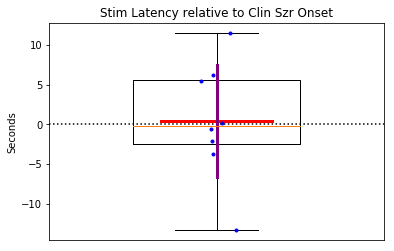

In [29]:
plt.figure(1)
plt.clf()
plt.boxplot(stim_lat[clin_bool])
plt.ylabel('Seconds')
plt.xticks([])
plt.title('Stim Latency relative to Clin Szr Onset')
xlim=[.85, 1.15]
plt.xlim(xlim)
plt.plot(xlim,[0, 0],'k:')
plt.xlim(xlim)
mn_lat=np.mean(stim_lat[clin_bool])
plt.plot([.95, 1.05],[mn_lat, mn_lat],'r-',linewidth=3)
sd_lat=np.std(stim_lat[clin_bool])
plt.plot([1, 1],[mn_lat-sd_lat, mn_lat+sd_lat],color='purple',linewidth=3)
plt.plot(np.ones(n_clin_szr)+(np.random.rand(n_clin_szr)-0.5)/25,stim_lat[clin_bool],'b.')

In [46]:
train_subs_list=[1096, 253]
ftr_root='/Users/davidgroppe/PycharmProjects/SZR_ANT/EU_GENERAL/EU_GENERAL_FTRS'
ftr='SE'
dsamp_pcnt=1
ftr_info_dict=eu.data_size_and_fnames(train_subs_list, ftr_root, ftr, dsamp_pcnt)
print(ftr_info_dict.keys())

Working on sub 1096
8 non-szr files found
38 szr files found
47190 total # of NON-szr time windows for this sub
46818 total # of SZR time windows for this sub
Working on sub 253
5 non-szr files found
29 szr files found
28302 total # of NON-szr time windows for this sub
27675 total # of SZR time windows for this sub
dict_keys(['ftr_dim', 'grand_non_fnames', 'grand_n_non_wind', 'szr_file_chans', 'grand_szr_fnames', 'grand_n_szr_wind', 'szr_file_subs', 'non_file_subs', 'non_file_chans'])


In [23]:
np.random.permutation(10)[:4]

array([1, 7, 2, 4])

In [54]:
train_subs_list=[1125, 1096, 253]
ftr_root='/Users/davidgroppe/PycharmProjects/SZR_ANT/EU_GENERAL/EU_GENERAL_FTRS'
ftr='SE'
dsamp_pcnt=.1
ftr_info_dict=eu.data_size_and_fnames(train_subs_list, ftr_root, ftr, dsamp_pcnt)
print(ftr_info_dict.keys())

n_dim=ftr_info_dict['ftr_dim']
n_non_wind=ftr_info_dict['grand_n_non_wind']
n_szr_wind=ftr_info_dict['grand_n_szr_wind']
n_wind=n_non_wind+n_szr_wind
ftrs, szr_class, sub_id=eu.import_data(ftr_info_dict['grand_szr_fnames'], ftr_info_dict['grand_non_fnames'],
                                       ftr_info_dict['szr_file_subs'],ftr_info_dict['non_file_subs'],
                                       n_szr_wind, n_non_wind, n_dim, dsamp_pcnt)
print(ftrs.shape)

Working on sub 1096
8 non-szr files found
38 szr files found
4720 total # of NON-szr time windows for this sub
4683 total # of SZR time windows for this sub
Working on sub 253
5 non-szr files found
29 szr files found
2830 total # of NON-szr time windows for this sub
2769 total # of SZR time windows for this sub
Working on sub 1125
2 non-szr files found
28 szr files found
3456 total # of NON-szr time windows for this sub
3430 total # of SZR time windows for this sub
dict_keys(['ftr_dim', 'grand_non_fnames', 'grand_n_non_wind', 'szr_file_chans', 'grand_szr_fnames', 'grand_n_szr_wind', 'szr_file_subs', 'non_file_subs', 'non_file_chans'])
1096_HL2-HL3
Loading file /Users/davidgroppe/PycharmProjects/SZR_ANT/EU_GENERAL/EU_GENERAL_FTRS/SE/1096/1096_HL2_HL3_non.mat
1096_HL3-HL4
Loading file /Users/davidgroppe/PycharmProjects/SZR_ANT/EU_GENERAL/EU_GENERAL_FTRS/SE/1096/1096_HL3_HL4_non.mat
1096_HL4-HL5
Loading file /Users/davidgroppe/PycharmProjects/SZR_ANT/EU_GENERAL/EU_GENERAL_FTRS/SE/1096/109

In [55]:
print(ftr_info_dict['grand_n_szr_wind'])
print(ftr_info_dict['grand_n_non_wind'])

10882
11006


In [35]:
print(ftr_info_dict['grand_n_szr_wind'])
print(ftr_info_dict['grand_n_non_wind'])

46818
47190


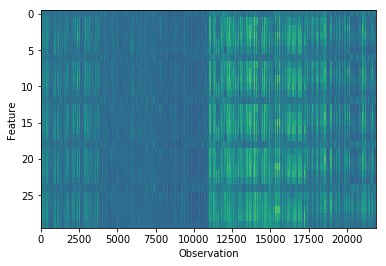

In [57]:
plt.figure(1)
plt.clf()
min_ftr=np.min(ftrs)
plt.imshow(np.log10(ftrs.T-min_ftr+1),aspect='auto');
plt.ylabel('Feature')
plt.xlabel('Observation')

In [2]:
in_fname='/Users/davidgroppe/PycharmProjects/SZR_ANT/MODELS/genLogregSe_1/classify_metrics_srch.npz'

In [11]:
npz=np.load('temp_apply_models_to_subsamp.npz')
print(npz.keys())
print(np.unique(npz['szr_class']))
print(np.unique(npz['class_hat']))

['class_hat', 'szr_class', 'sub_id']
[ 0.  1.]
[  7.39455455e-14   3.40509882e-08   2.20210802e-06 ...,   1.00000000e+00
   1.00000000e+00   1.00000000e+00]


In [30]:
subs=np.unique(npz['sub_id'])
crct=(npz['class_hat']>0.5)==npz['szr_class']
print(np.mean(crct))
ictal=npz['szr_class']==1
grand_sens=np.mean(crct[ictal])
grand_spec=np.mean(crct[ictal==False])
print('Grand (unwtd) Sensitivity/Spec: %f/%f' % (grand_sens,grand_spec))
print('Grand (unwts) Balanced Acc: %f' % (grand_sens/2+grand_spec/2))
for sub in subs:
    print()
    sub_bool=npz['sub_id']==sub
    print('Sub %d' % int(sub))
    print('%f of data' % np.mean(sub_bool))
    #sens=np.mean(crct[ictal and sub_bool])
    sens=np.mean(crct[np.multiply(ictal,sub_bool)])
    spec=np.mean(crct[np.multiply(ictal==False,sub_bool)])
    acc=(sens+spec)/2
    print('Acc (Sens/Spec): %f (%f/%f)' % (acc,sens,spec))

KeyError: 'sub_id is not a file in the archive'

In [26]:
# Load downsampled files to get # of observations
subs=[1077, 1096, 253, 590, 620, 958]
n_obs=0
for sub in subs:
    in_fname='kdownsampled_'+str(sub)+'.npz'
    npz=np.load(in_fname)
    n_obs+=npz['ftrs_dsamp'].shape[0]
n_ftrs=npz['ftrs_dsamp'].shape[1]
print(npz.keys())
print('Total # of observations %d' % n_obs)
print('Total # of features %d' % n_ftrs)

['ftrs_dsamp', 'szr_class_dsamp']
Total # of observations 26170
Total # of features 30


In [23]:
npz['ftrs_dsamp'].shape[0]

5816

In [33]:
# Concat downsampled data
ftrs=np.zeros((n_obs,n_ftrs))
sub_ids=np.zeros(n_obs,dtype=int)
szr_class=np.zeros(n_obs)
obs_ct=0;
for sub in subs:
    in_fname='kdownsampled_'+str(sub)+'.npz'
    npz=np.load(in_fname)
    n_obs_this_sub=npz['ftrs_dsamp'].shape[0]
    ftrs[obs_ct:obs_ct+n_obs_this_sub,:]=npz['ftrs_dsamp']
    sub_ids[obs_ct:obs_ct+n_obs_this_sub]=sub
    szr_class[obs_ct:obs_ct+n_obs_this_sub]=npz['szr_class_dsamp']
    obs_ct+=n_obs_this_sub
 

done


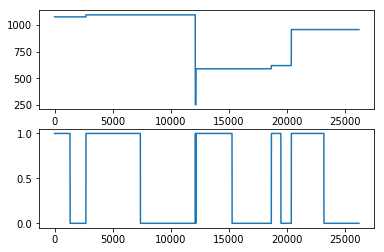

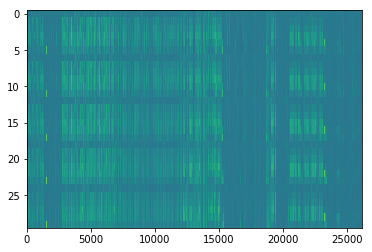

In [42]:
plt.figure(1)
plt.clf()
plt.subplot(2,1,1)
plt.plot(sub_ids)

plt.subplot(2,1,2)
plt.plot(szr_class)

mn_val=np.min(ftrs)
plt.figure(2)
plt.clf()
plt.imshow(np.log10(ftrs.T-mn_val+1),aspect='auto')
print('done')

In [36]:
sub_ids[:3]

array([1077, 1077, 1077])